In [1]:
from pediatricIQphantoms.make_phantoms import mirt_sim
import matplotlib.pyplot as plt

In [2]:
# mirt_sim('CTP404')

In [3]:
from pediatricIQphantoms import CTobj
res = CTobj('CTP404').run()





The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ellipse_im: 6 of 10 0.0
ct_sim, simulation: [1/1]
fbp2_back_fan: 79 of 580 0.0
fbp2_back_fan: 156 of 580 0.0
fbp2_back_fan: 234 of 580 0.1
fbp2_back_fan: 312 of 580 0.1
fbp2_back_fan: 390 of 580 0.1
fbp2_back_fan: 467 of 580 0.1
fbp2_back_fan: 545 of 580 0.1


In [4]:
res.recon.shape

(1, 512, 512)

In [5]:
res.write_to_dicom('test.dcm')

(512, 512)


[PosixPath('test.dcm')]

In [6]:
def ctshow(img, win=None, lvl=None):
    if img.ndim > 2: img = img[0]
    if (win is None) or (lvl is None):
        vmin = None
        vmax = None
    else:
        vmin = lvl-win/2
        vmax = lvl+win/2
    plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar()

Text(0.5, 1.0, 'Ground Truth')

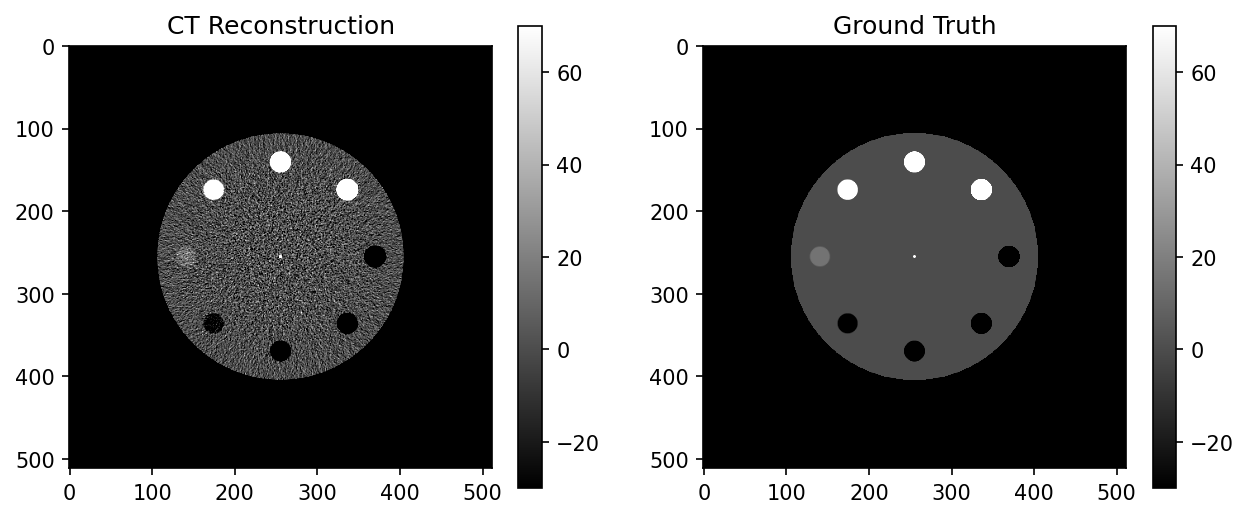

In [7]:
plt.figure(figsize=(10,4), dpi=150)
plt.subplot(1,2,1)
win, lvl = 100, 20
ctshow(res.recon, win, lvl)
plt.title('CT Reconstruction')
plt.subplot(1,2,2)
ctshow(res.groundtruth, win, lvl)
plt.title('Ground Truth')

Text(0, 0.5, 'detector index')

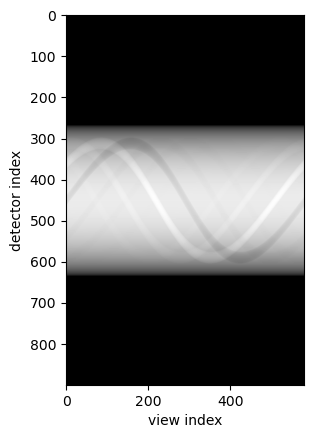

In [8]:
import numpy as np
plt.imshow(-np.log(res.projections), cmap='gray')
plt.xlabel('view index')
plt.ylabel('detector index')

## Different Phantoms

In [9]:
ctp404 = CTobj('CTP404').run()
cct189 = CTobj('CCT189', I0=3e7).run() # <-- higher dose to show low contrast lesions
uniform = CTobj('uniform').run()







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ellipse_im: 7 of 10 0.0
ct_sim, simulation: [1/1]
fbp2_back_fan: 79 of 580 0.0
fbp2_back_fan: 157 of 580 0.0
fbp2_back_fan: 235 of 580 0.1
fbp2_back_fan: 313 of 580 0.1
fbp2_back_fan: 392 of 580 0.1
fbp2_back_fan: 470 of 580 0.1
fbp2_back_fan: 549 of 580 0.1






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson

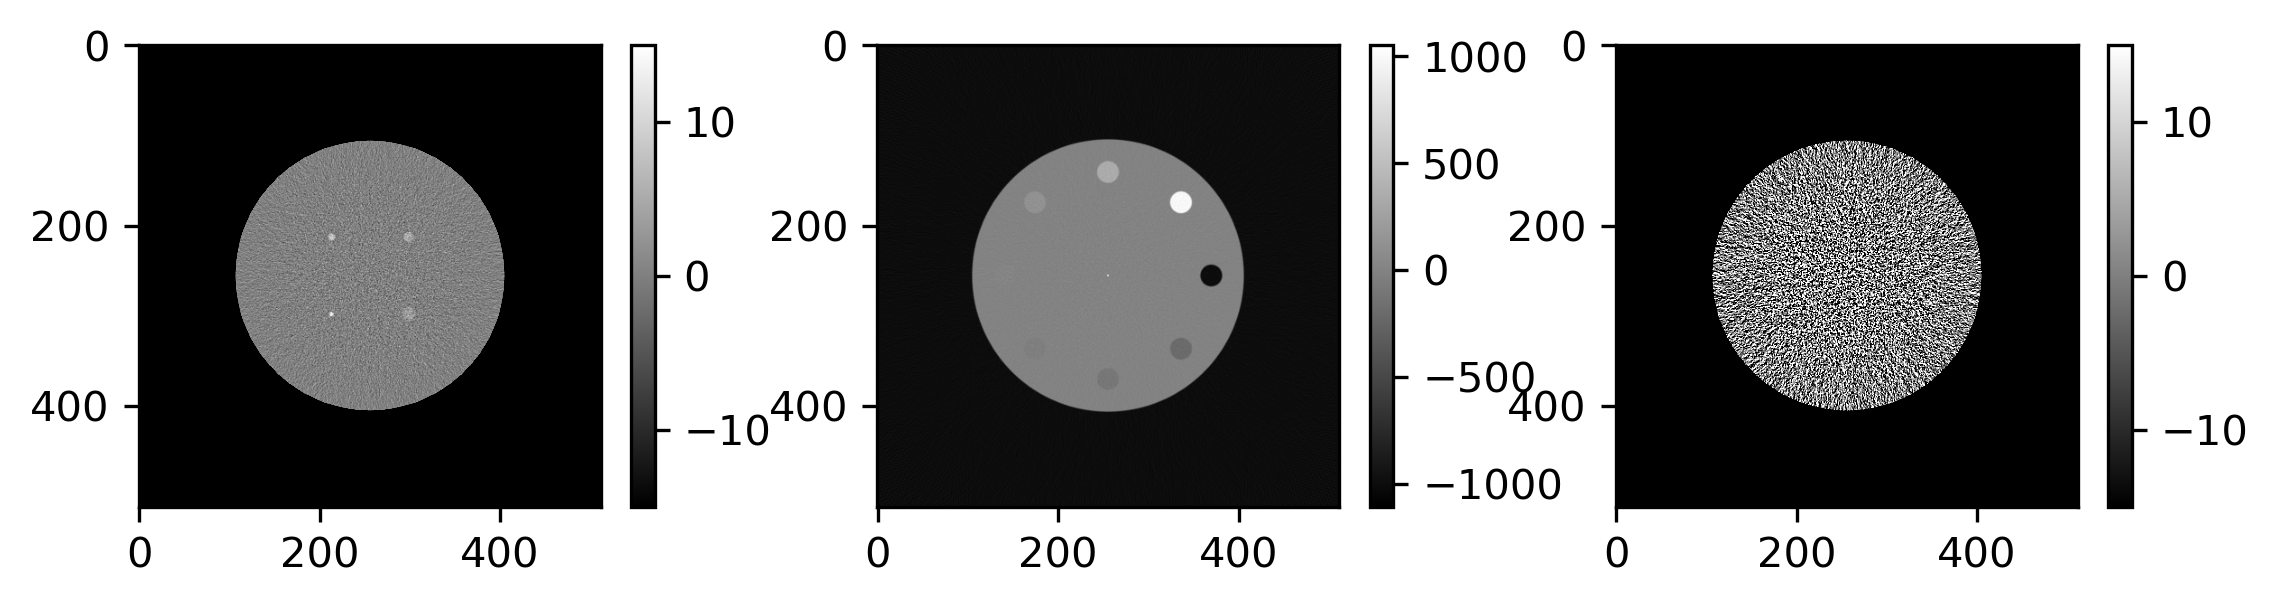

In [10]:
plt.figure(figsize=(9, 2), dpi=300)

plt.subplot(1,3,1)
ctshow(cct189.recon, 30, 0)

plt.subplot(1,3,2)
ctshow(ctp404.recon)

plt.subplot(1,3,3)
ctshow(uniform.recon, 30, 0)
plt.show()

## Different Dose Levels

In [11]:
CTobj?

Init signature:
CTobj(
    phantom='CCT189',
    patient_diameter=200,
    reference_diameter=200,
    reference_fov=340,
    I0=300000.0,
    nb=900,
    na=580,
    ds=1,
    sid=595,
    sdd=1085.6,
    offset_s=1.25,
    down=1,
    has_bowtie=False,
    add_noise=True,
    aec_on=True,
    nx=512,
    fov=340,
    fbp_kernel='hanning,2.05',
    nsims=1,
    relative_lesion_diameter=False,
    age=0,
    patientname='',
    patientid=0,
    studyname='',
    studyid=0,
    seriesname='',
    seriesid=0,
) -> None
Docstring:      A class to hold CT simulation data
File:           ~/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/make_phantoms.py
Type:           type
Subclasses:     

In [12]:
import numpy as np
doses = np.linspace(1e5, 8e5, 50)
doses = np.linspace(1e5, 8e5, 3)

res_list = [CTobj('Uniform', I0=I0, nsims=2).run() for I0 in doses]







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/2]
fbp2_back_fan: 80 of 580 0.0
fbp2_back_fan: 159 of 580 0.0
fbp2_back_fan: 238 of 580 0.1
fbp2_back_fan: 318 of 580 0.1
fbp2_back_fan: 398 of 580 0.1
fbp2_back_fan: 477 of 580 0.1
fbp2_back_fan: 557 of 580 0.1
ct_sim, simulation: [2/2]
fbp2_back_fan: 80 of 580 0.0
fbp2_back_fan: 160 of 580 0.0
fbp2_back_fan: 240 of 580 0.1
fbp2_back_fan: 319 of 580 0.1
fbp2_back_fan: 399 of 580 0.1
fbp2_back_fan: 478 of 580 0.1
fbp2_back_fan: 558 of 580 0.1






The variable "irtdir" is not 

In [13]:
len(res_list)

3

In [14]:
res_list[0]

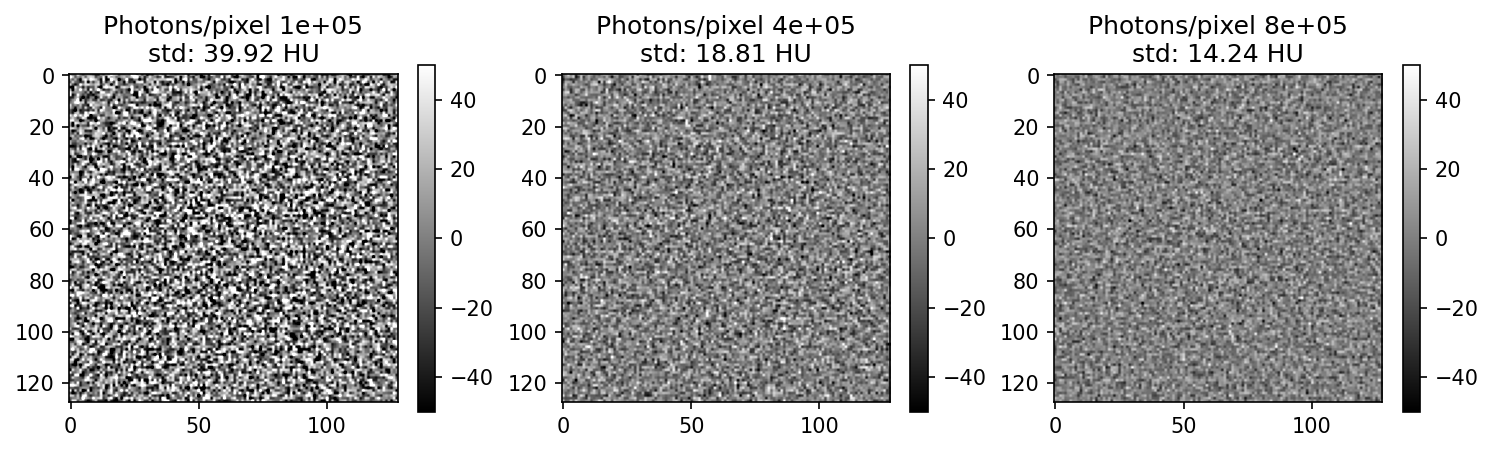

In [15]:
nres = 3
std_noise = []
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    nz, nx, ny = res.recon.shape
    if idx//3 == 0:
        plt.subplot(1, nres, idx+1)
        ctshow(res.recon[0, nx//2-nx//8:nx//2+nx//8, nx//2-nx//8:nx//2+nx//8], 100, 0)
    nz, nx, ny = res.recon.shape
    std_noise.append(res.recon[0, nx//2-nx//8:nx//2+nx//8, nx//2-nx//8:nx//2+nx//8].std())
    plt.title(f'Photons/pixel {doses[idx]:1.1g}\nstd: {std_noise[idx]:2.2f} HU')

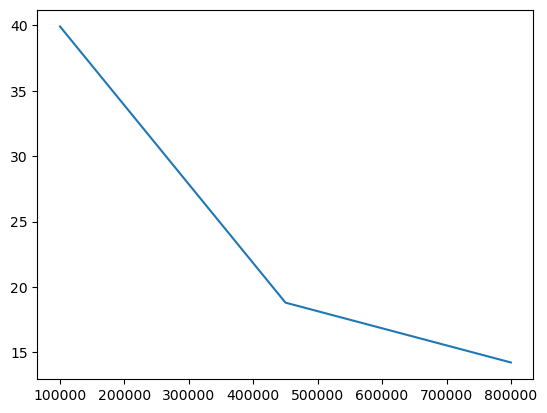

In [16]:
plt.plot(doses, std_noise)

In [17]:
cct189.recon.ndim

3

In [18]:
def write_dicom_vol(img, fname):
    fname = Path(fname)
    imdir = fname.parent / fname.stem
    imdir.mkdir(exist_ok=True, parents=True)
    for idx, slc in enumerate(img):
        write_to_dicom(slc, imdir/f'{fname.stem}_{idx:03d}.dcm')

In [19]:
for im in res.recon:
    print(im.shape)

(512, 512)
(512, 512)


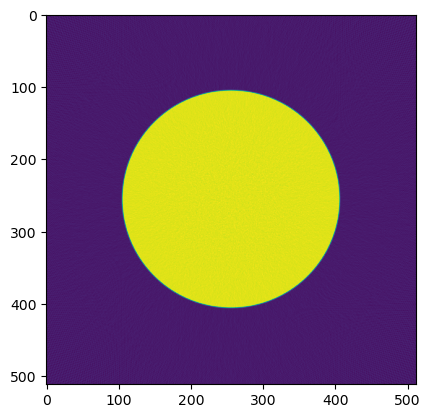

In [20]:
plt.imshow(res.recon[0])

In [21]:
from pathlib import Path
writedir=Path('test')
for d, res in zip(doses, res_list):
    res.write_to_dicom(writedir / f'{int(d)}.dcm')

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


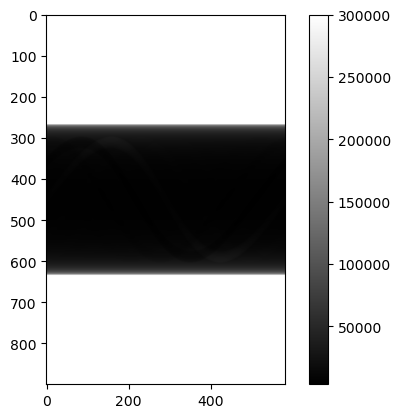

In [22]:
plt.imshow(ctp404.projections, cmap='gray')
plt.colorbar()

In [23]:
std_noise[0]

39.91879405790674

## Recon Type

In [28]:
cutoff_freq = [0.5, 0.85, 2.05]

res_list = [CTobj('CCT189', I0=1e6, fbp_kernel=f'hanning,{freq:1.2f}').run() for freq in cutoff_freq]    







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/1]
fbp2_back_fan: 79 of 580 0.0
fbp2_back_fan: 158 of 580 0.0
fbp2_back_fan: 237 of 580 0.1
fbp2_back_fan: 316 of 580 0.1
fbp2_back_fan: 396 of 580 0.1
fbp2_back_fan: 475 of 580 0.1
fbp2_back_fan: 554 of 580 0.1






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_

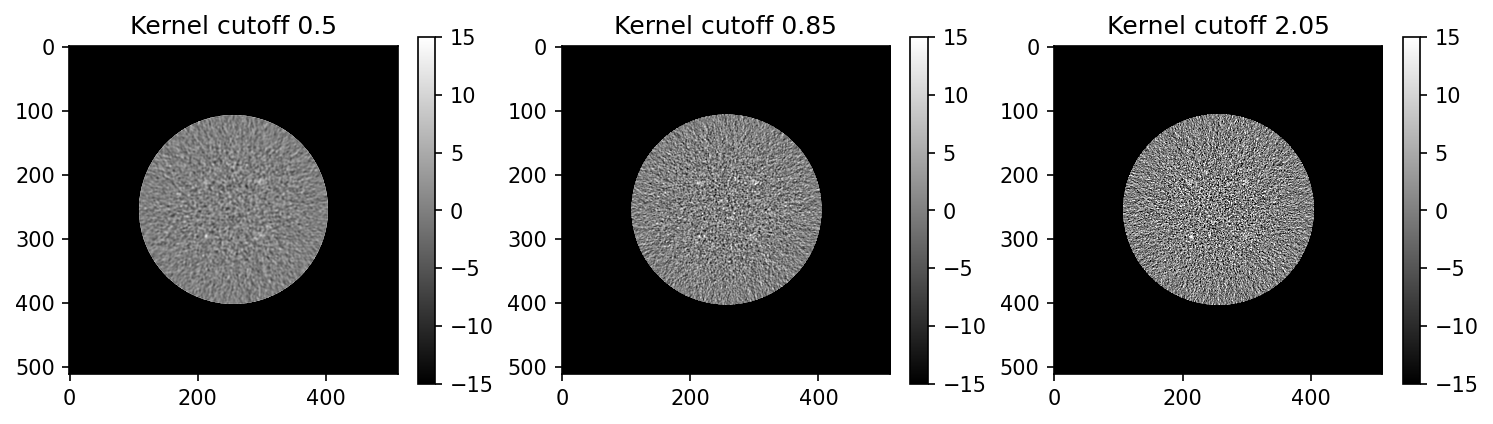

In [29]:
nres = len(res_list)
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    plt.subplot(1, nres, idx+1)
    ctshow(res.recon, 30, 0)
    plt.title(f'Kernel cutoff {cutoff_freq[idx]}')

## Phantom Size and FOV
(most important piece)

In [30]:
phantom_diameters = [112, 185, 292]

res_list = [CTobj('CCT189', I0=1e6, patient_diameter=d).run() for d in phantom_diameters]   







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/1]
fbp2_back_fan: 86 of 580 0.0
fbp2_back_fan: 170 of 580 0.0
fbp2_back_fan: 257 of 580 0.1
fbp2_back_fan: 341 of 580 0.1
fbp2_back_fan: 426 of 580 0.1
fbp2_back_fan: 512 of 580 0.1






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/

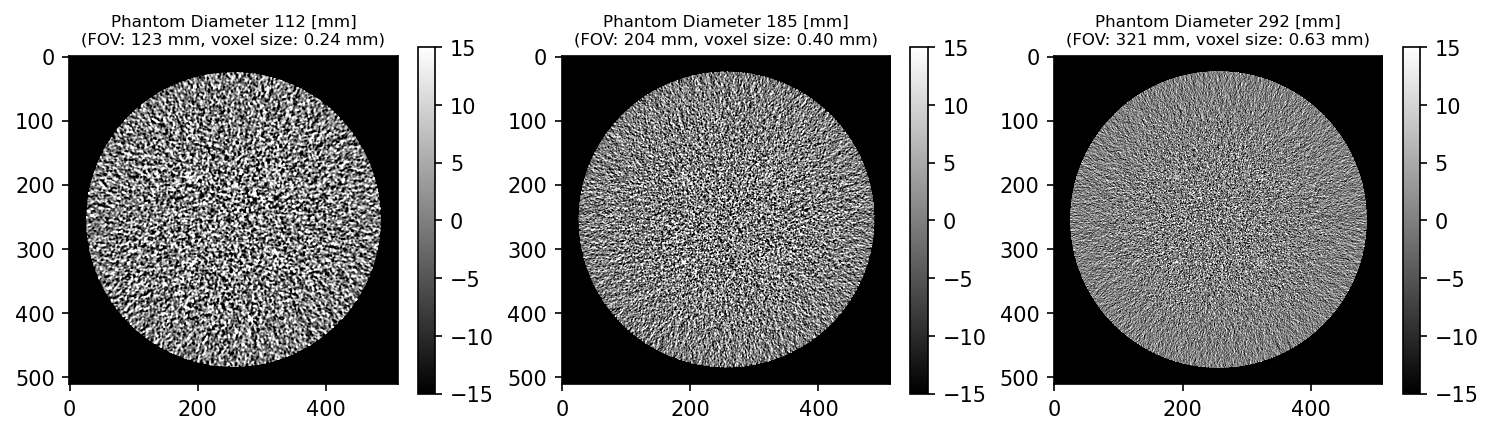

In [31]:
fov = np.array(phantom_diameters)*1.1 # in mm
dx = fov/res.recon.shape[-1]

nres = len(res_list)
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    plt.subplot(1, nres, idx+1)
    ctshow(res.recon, 30, 0)
    plt.title(f'Phantom Diameter {phantom_diameters[idx]} [mm]\n(FOV: {fov[idx]:2.0f} mm, voxel size: {dx[idx]:2.2f} mm)', fontsize=8)

By default when FOV is not specified, it defaults to a body fitting 1.1x the phantom diameter. Note how FOV changes the relative pixel size







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/1]
fbp2_back_fan: 85 of 580 0.0
fbp2_back_fan: 170 of 580 0.0
fbp2_back_fan: 254 of 580 0.1
fbp2_back_fan: 339 of 580 0.1
fbp2_back_fan: 424 of 580 0.1
fbp2_back_fan: 509 of 580 0.1


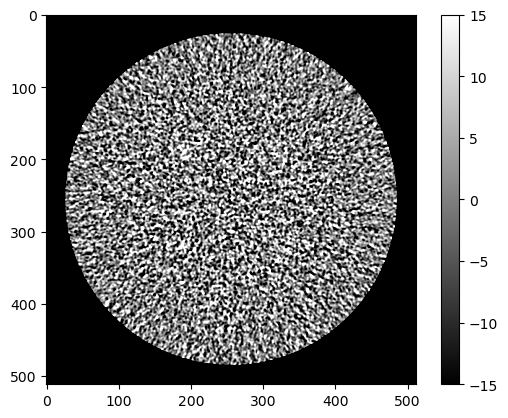

In [32]:
res = CTobj('CCT189', I0=1e6, patient_diameter=112, fov=500).run()
ctshow(res.recon, 30, 0)

*Seems FOV not changing anything need to list as a fix*